In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


NameError: name 'a' is not defined

In [3]:

train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [8]:
columns = train.columns

In [19]:
null_cols = []
for col in columns:

    print('Null value check {}'.format(train[col].isnull().sum()))
    print('type check {} type : {}'.format(col , train[col].dtypes))
    if train[col].isnull().sum() > 0:
        null_cols.append(col)
# null value check

Null value check 0
type check Id type : int64
Null value check 0
type check MSSubClass type : int64
Null value check 0
type check MSZoning type : object
Null value check 259
type check LotFrontage type : float64
Null value check 0
type check LotArea type : int64
Null value check 0
type check Street type : object
Null value check 1369
type check Alley type : object
Null value check 0
type check LotShape type : object
Null value check 0
type check LandContour type : object
Null value check 0
type check Utilities type : object
Null value check 0
type check LotConfig type : object
Null value check 0
type check LandSlope type : object
Null value check 0
type check Neighborhood type : object
Null value check 0
type check Condition1 type : object
Null value check 0
type check Condition2 type : object
Null value check 0
type check BldgType type : object
Null value check 0
type check HouseStyle type : object
Null value check 0
type check OverallQual type : int64
Null value check 0
type check Ov

In [24]:
# null value 를 mean 값으로 채울 것인지 median 값으로 채울 것인지 등등을 결정
#
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [28]:
# 골목 진입 불가인 집이 훨씬 많다

train['Alley'].isnull().sum()

1369

<AxesSubplot:>

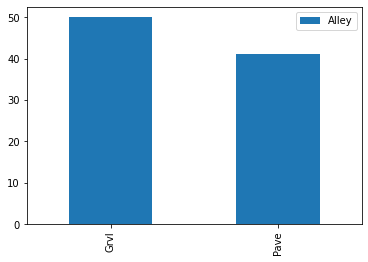

In [36]:
pd.DataFrame(train['Alley'].value_counts()).plot.bar()

In [46]:
train.loc[train['Alley'].isnull() == True,:]['Alley'] = 'noalleyaccess'

/var/folders/c6/2j22b1rd02778st12c0mcr3w0000gn/T/ipykernel_55525/497591158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['Alley'].isnull() == True,:]['Alley'] = 'noalleyaccess'


In [45]:
train.loc[train['Alley'].isnull() == True,:]['Alley'] =

/var/folders/c6/2j22b1rd02778st12c0mcr3w0000gn/T/ipykernel_55525/325686403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[train['Alley'].isnull() == True,:]['Alley'] = 'zero'


In [47]:
train['Alley']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: Alley, Length: 1460, dtype: object

In [49]:

import seaborn as sns

In [52]:

#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
sns.histplot(train['SalePrice'])

In [ ]:
train[null_cols]

In [ ]:
train[null_cols].mean()

In [63]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'

In [64]:
# null value eda

data = pd.concat([train['SalePrice'], train[var]] ,axis=1)

In [65]:
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

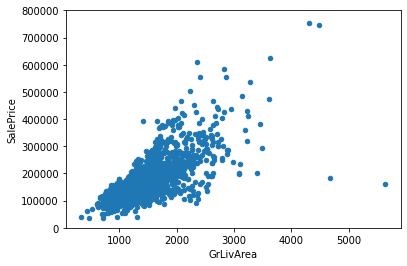

In [68]:
data.plot.scatter(x=var, y= 'SalePrice',ylim=(0,800000) )

In [73]:
var = 'TotalBsmtSF'


In [74]:
data = pd.concat([train['SalePrice'],train[var]],axis=1)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

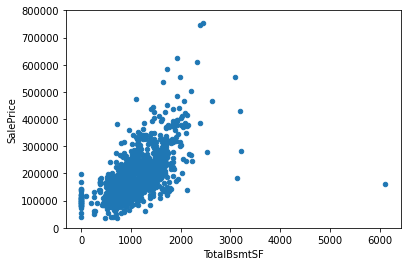

In [76]:
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [79]:
var = 'OverallQual'


In [81]:
data = pd.concat([train['SalePrice'], train[var]], axis=1)

(-0.5, 9.5, 0.0, 800000.0)

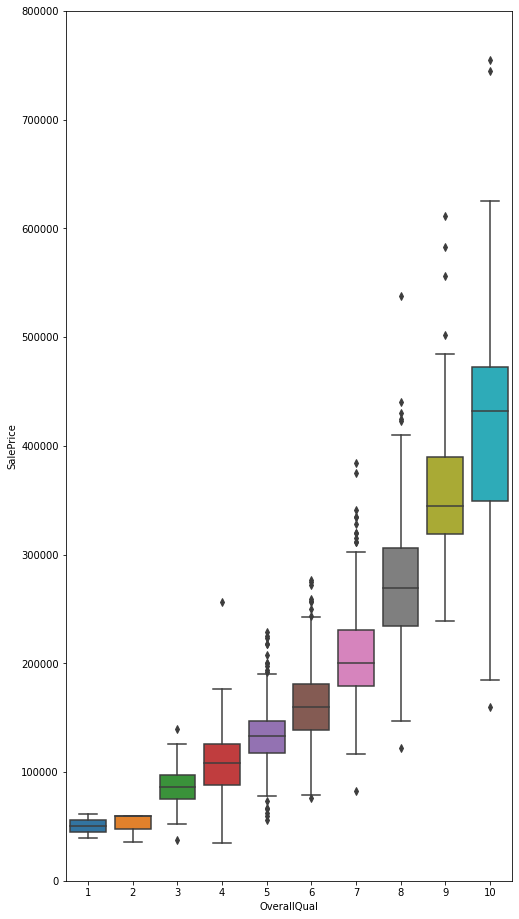

In [85]:
import matplotlib.pyplot as plt

fig ,ax = plt.subplots(figsize=(8,16))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0 ,ymax=800000)

In [86]:
var = 'YearBuilt'


In [87]:
data = pd.concat([train['SalePrice'], train[var]], axis=1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

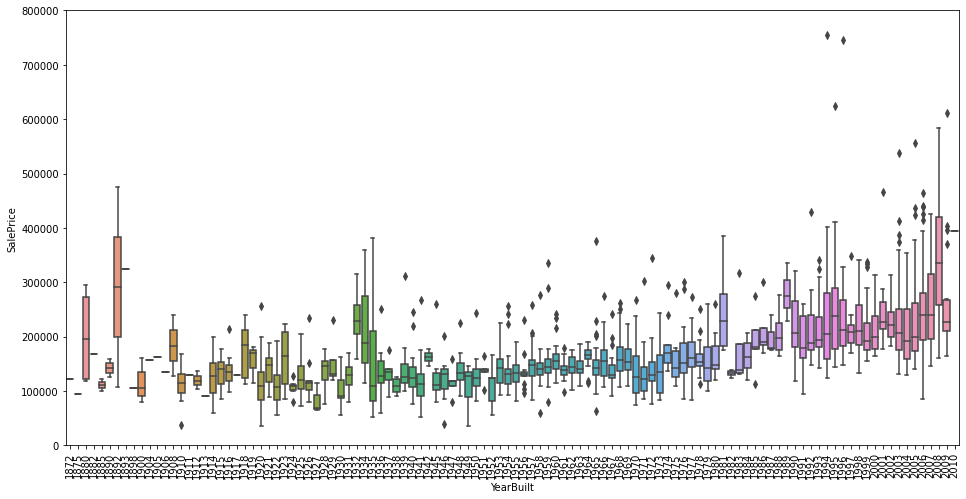

In [90]:
fig ,ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0 ,ymax=800000)
plt.xticks(rotation=90)

<AxesSubplot:>

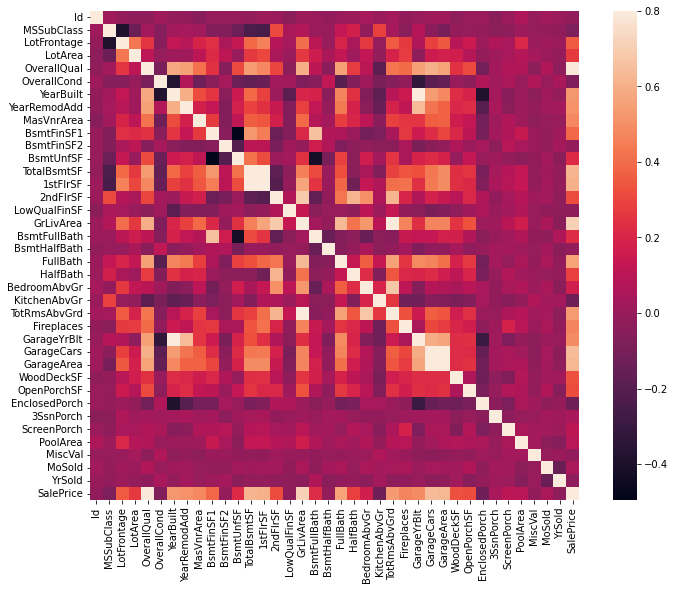

In [93]:
corrmat = train.corr()
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)


In [94]:
k = 10

In [100]:
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

In [111]:
import numpy as np

cm = np.corrcoef(train[cols].values.T)

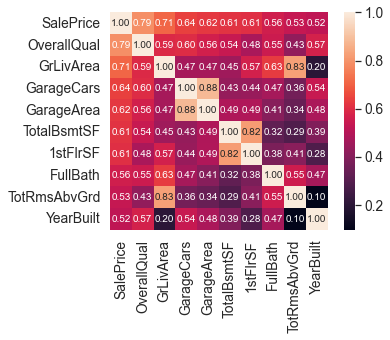

In [117]:
sns.set(font_scale=1.25)
sns.heatmap(cm ,cbar=True, annot=True, square=True , fmt='.2f', annot_kws = {'size' : 10}
            ,xticklabels=cols,yticklabels=cols)
plt.show()

In [119]:
sns.set()

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [122]:
sns.palplot(train[cols],size=2.5)
plt.show()

ValueError: Image size of 262800x180 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 262800x180 with 1 Axes>

In [ ]:
test.head()